<a href="https://colab.research.google.com/github/Tawheed-tariq/basic-ml-projects/blob/main/6.MAGIC/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [51]:
cols = ["fLength", "fWidth", "fSize", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('./drive/MyDrive/magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [52]:
df["class"] = (df["class"] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


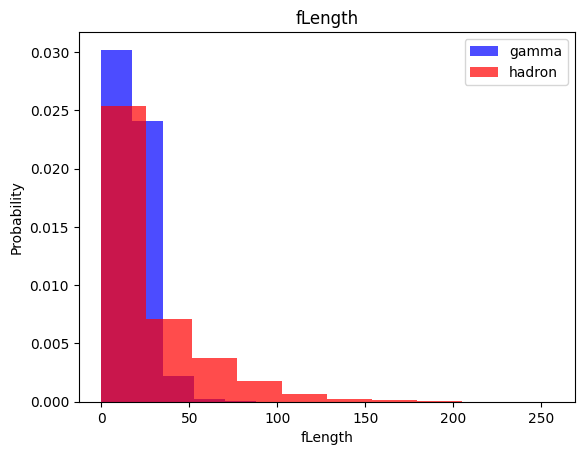

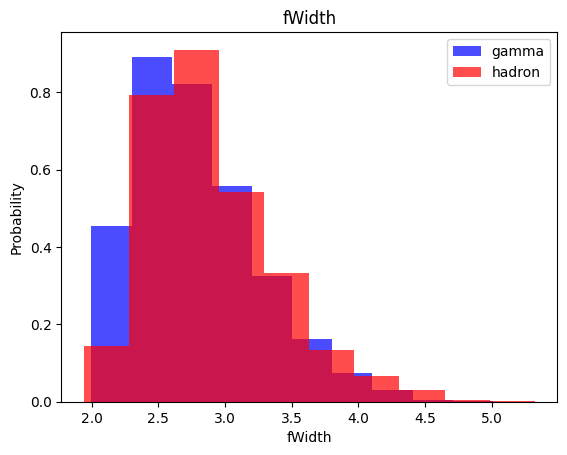

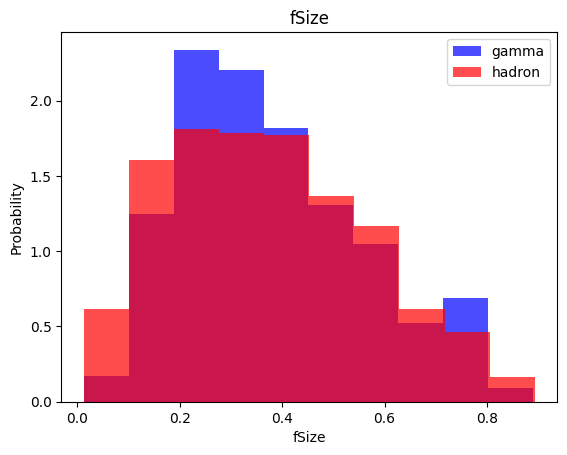

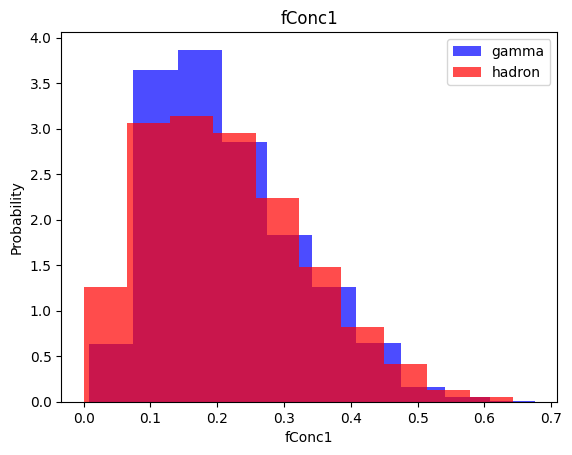

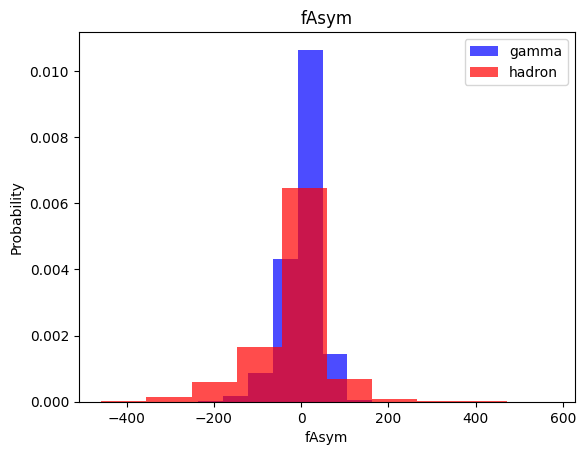

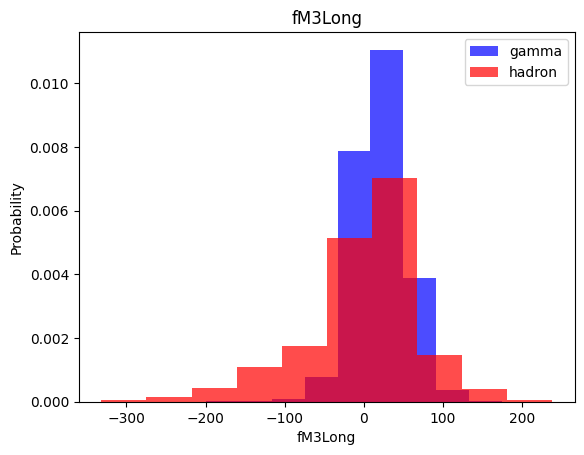

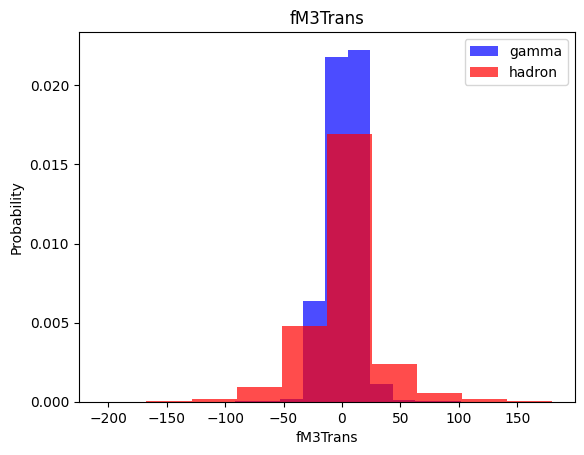

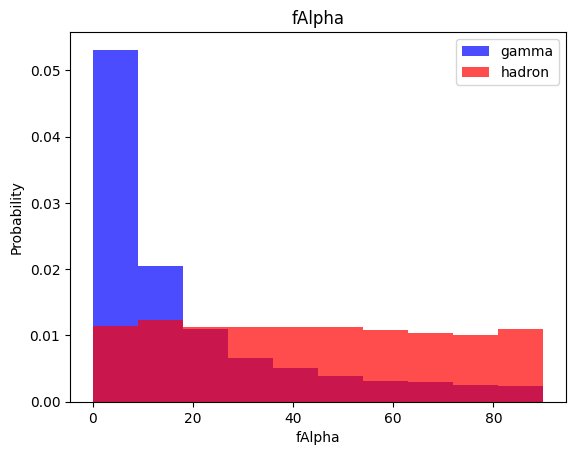

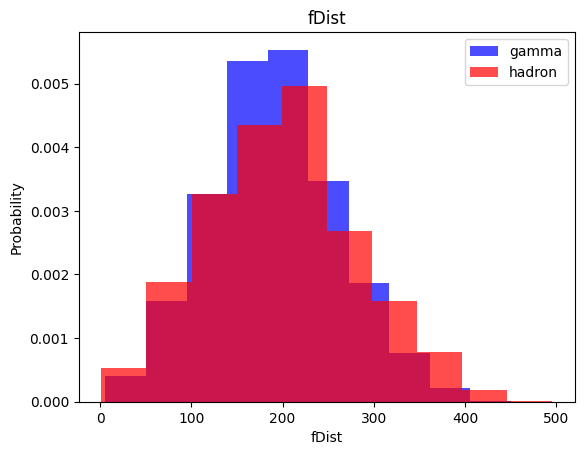

In [53]:
for labels in cols[:-1]:
    plt.hist(df[df["class"] == 1][labels], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][labels], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(labels)
    plt.ylabel("Probability")
    plt.xlabel(labels)
    plt.legend()
    plt.show()

In [54]:
train_val , test = train_test_split(df, test_size=0.2, random_state=42)
train , val = train_test_split(train_val, test_size=0.2, random_state=42)

In [55]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

# only 4283 are hadrons and 7889 are gamma this can be problem , so we need to increase number of hadrons
# to do this we use over sampler

7889
4283


In [56]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y


In [57]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

# only 4283 are hadrons and 7889 are gamma this can be problem , so we need to increase number of hadrons
# to do this we use over sampler
# so we set oversample = True in function call

7889
4283


In [58]:
train , X_train, y_train = scale_dataset(train , oversample=True)
val , X_val, y_val = scale_dataset(val , oversample=False)
test , X_test, y_test = scale_dataset(test , oversample=False)

In [59]:
print(sum(y_train == 1))
print(sum(y_train == 0))

# now both has same number of values

7889
7889


## K-Nearest neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
knn_pred = knn_model.predict(X_test)

In [63]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1344
           1       0.86      0.84      0.85      2460

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [66]:
nb_pred = nb_model.predict(X_test)

In [67]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54      1344
           1       0.74      0.91      0.82      2460

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [70]:
log_pred = log_model.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1344
           1       0.83      0.81      0.82      2460

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



## Support Vector machine

In [71]:
from sklearn.svm import SVC

In [72]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [73]:
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1344
           1       0.88      0.89      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.86      3804



## Neural Network

In [74]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [75]:
def plot_history(history):
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4 ))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


In [76]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr , batch_size, epochs):
    nn_model = tf.keras.Sequential([
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_prob), #randomly chooses some nodes and does not train them ('helps prevent overfitting')
        Dense(num_nodes, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=Adam(lr), loss='binary_crossentropy',  metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

16 nodes, dropout 0, learning rate 0.01, batch size 32


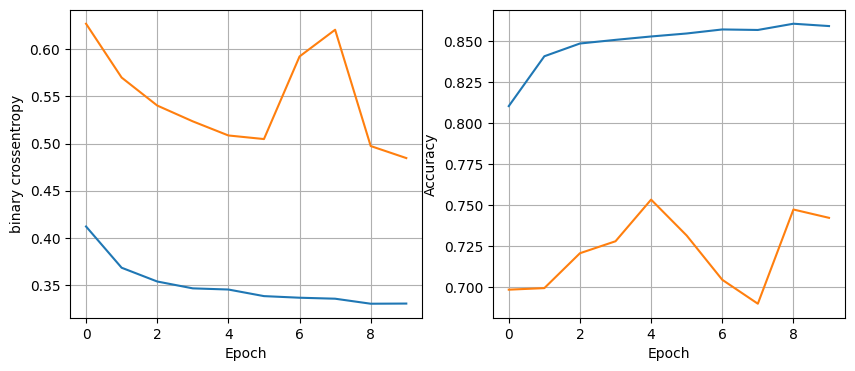

96/96 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8693
16 nodes, dropout 0, learning rate 0.01, batch size 64


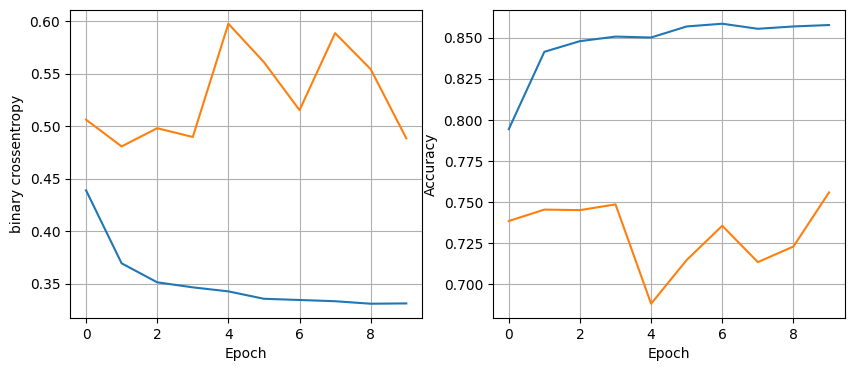

96/96 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8650
16 nodes, dropout 0, learning rate 0.01, batch size 128


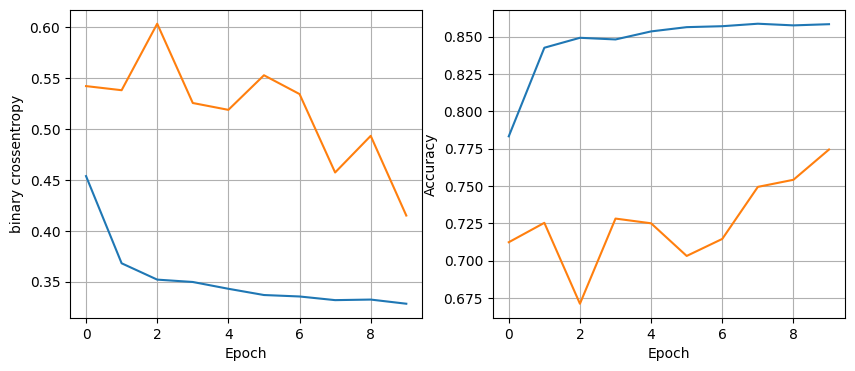

96/96 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8666
16 nodes, dropout 0, learning rate 0.005, batch size 32


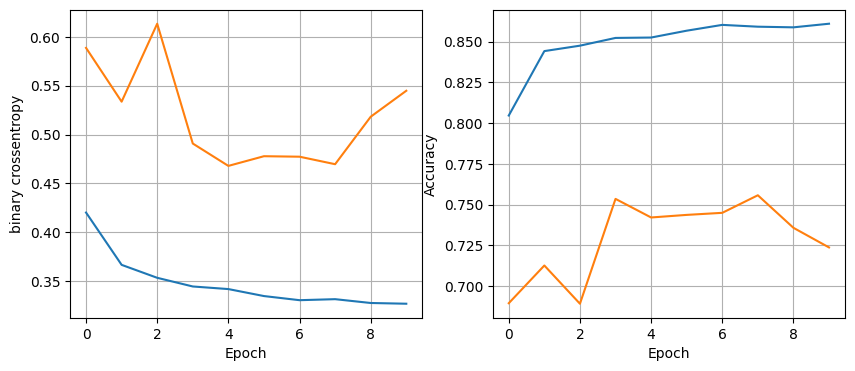

96/96 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8693
16 nodes, dropout 0, learning rate 0.005, batch size 64


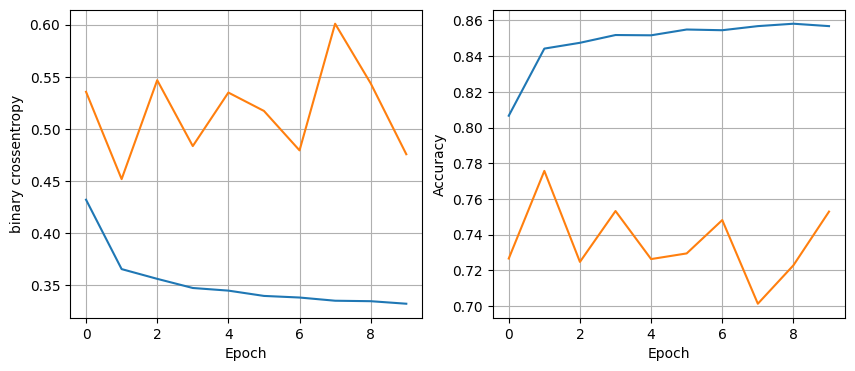

96/96 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8702
16 nodes, dropout 0, learning rate 0.005, batch size 128


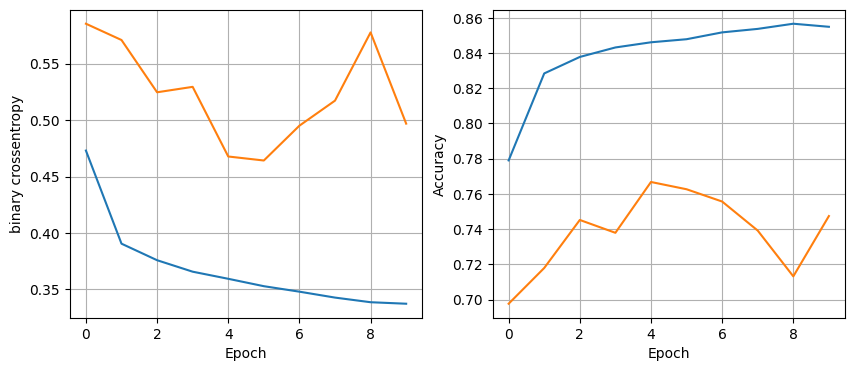

96/96 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8712
16 nodes, dropout 0, learning rate 0.001, batch size 32


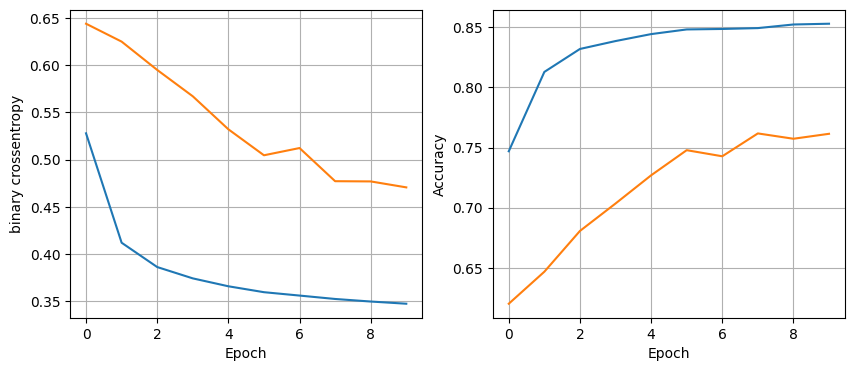

96/96 [==============================] - 0s 4ms/step - loss: 0.3446 - accuracy: 0.8591
16 nodes, dropout 0, learning rate 0.001, batch size 64


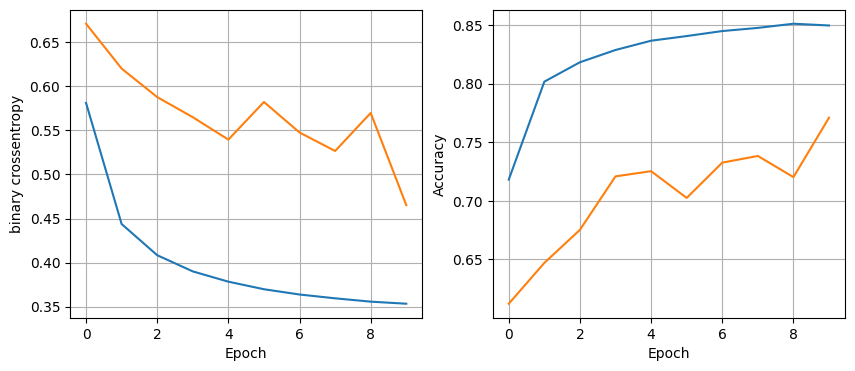

96/96 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8512
16 nodes, dropout 0, learning rate 0.001, batch size 128


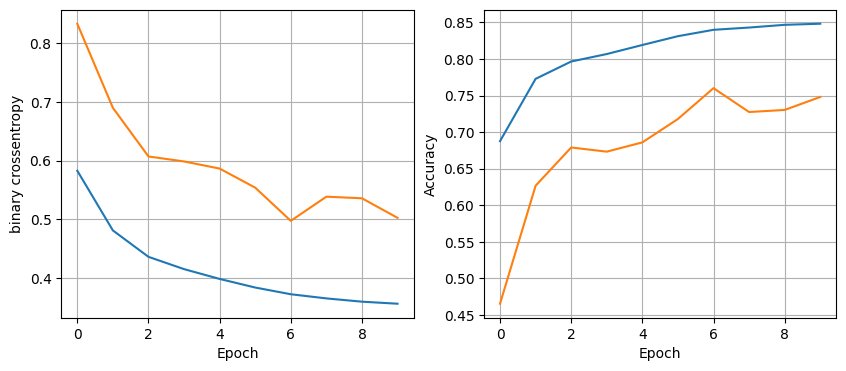

96/96 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8568
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


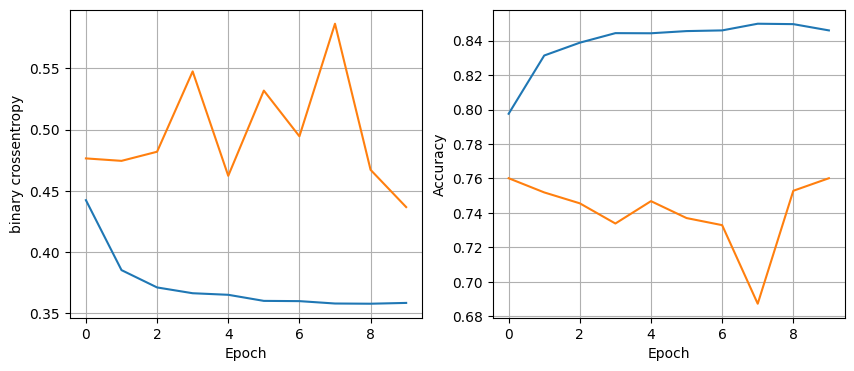

96/96 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8604
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


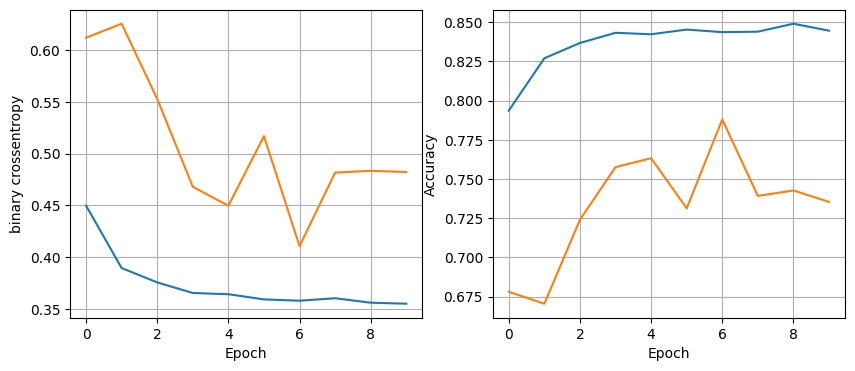

96/96 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8699
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


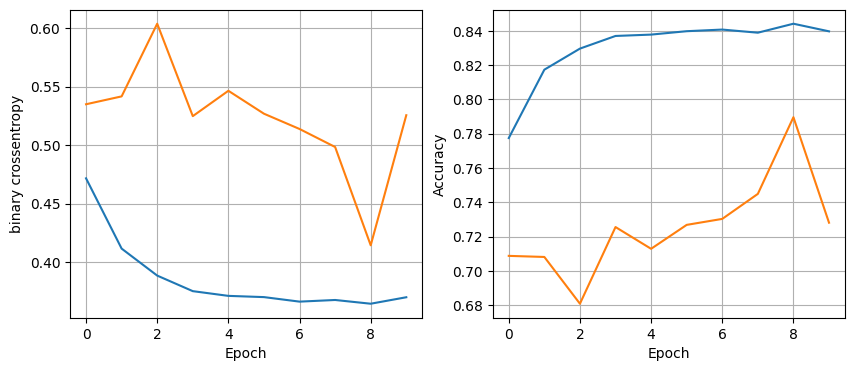

96/96 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8564
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


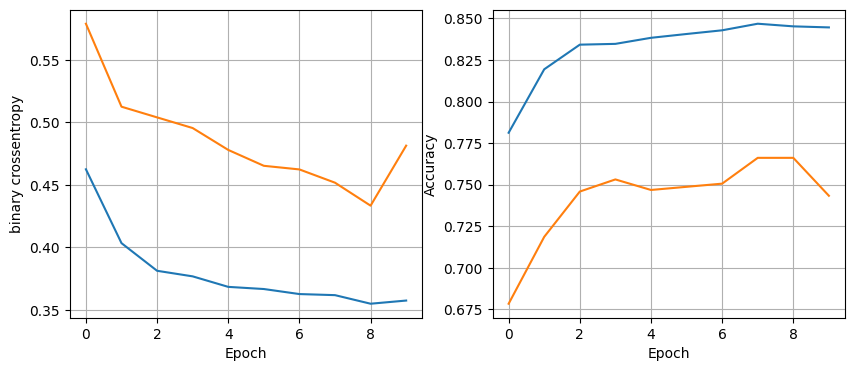

96/96 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8656
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


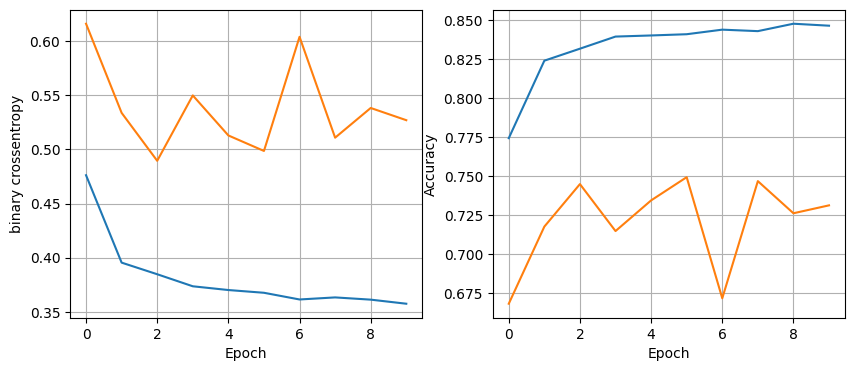

96/96 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8650
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


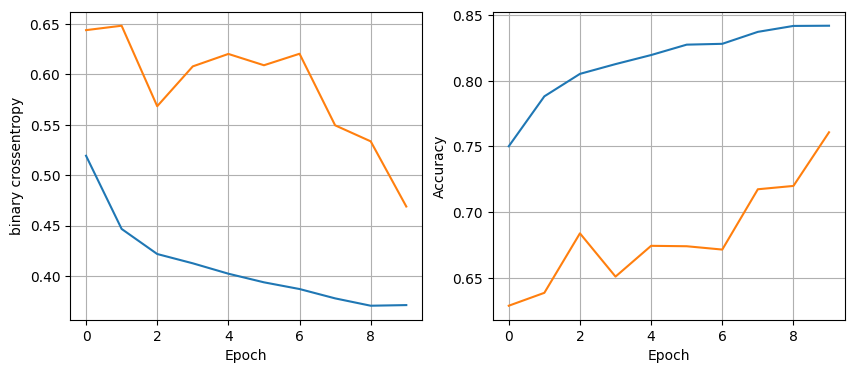

96/96 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8558
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


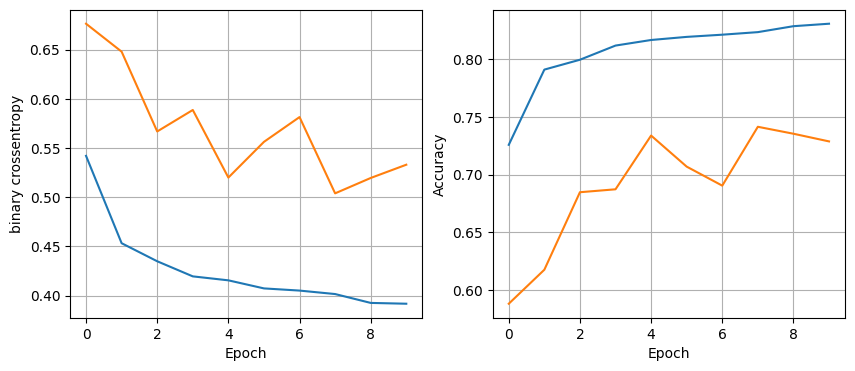

96/96 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8541
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


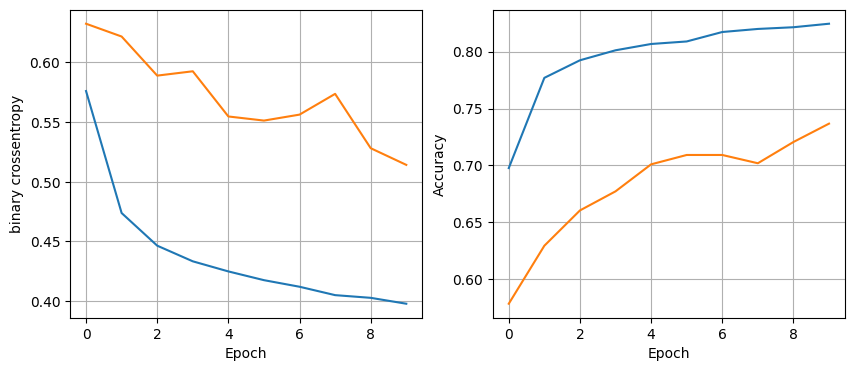

96/96 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8538
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


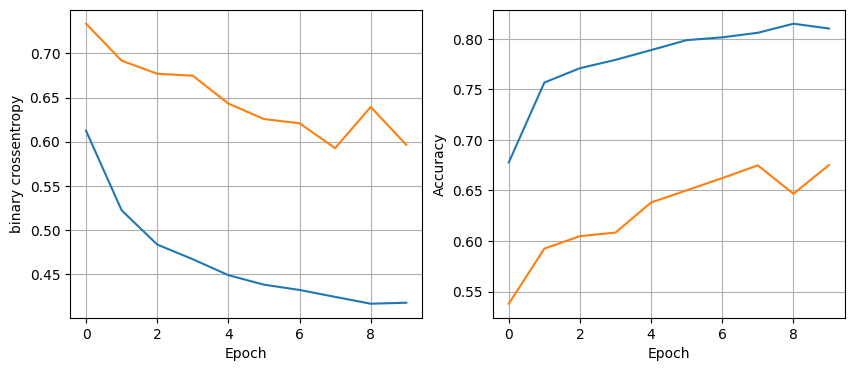

96/96 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8387
32 nodes, dropout 0, learning rate 0.01, batch size 32


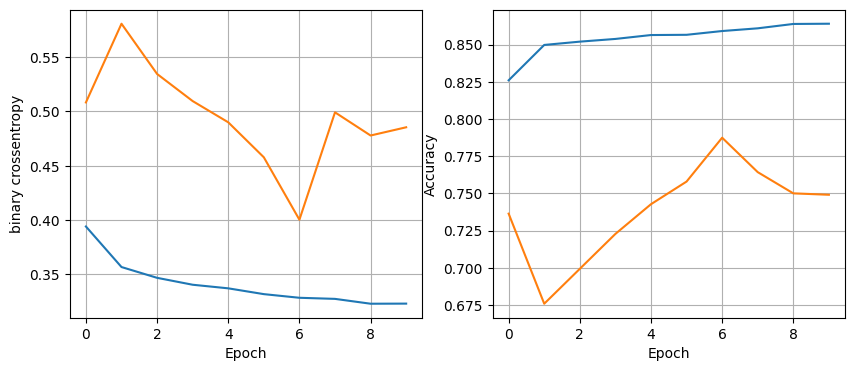

96/96 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8683
32 nodes, dropout 0, learning rate 0.01, batch size 64


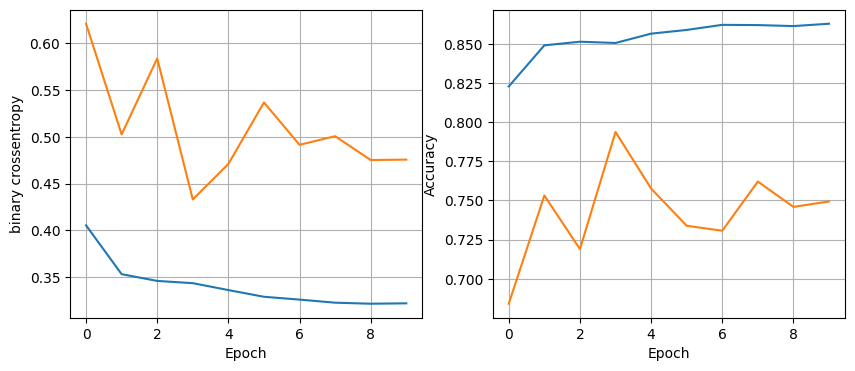

96/96 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8673
32 nodes, dropout 0, learning rate 0.01, batch size 128


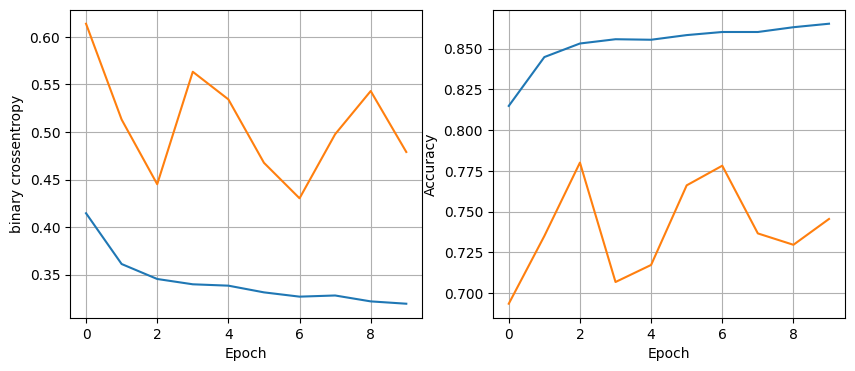

96/96 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8709
32 nodes, dropout 0, learning rate 0.005, batch size 32


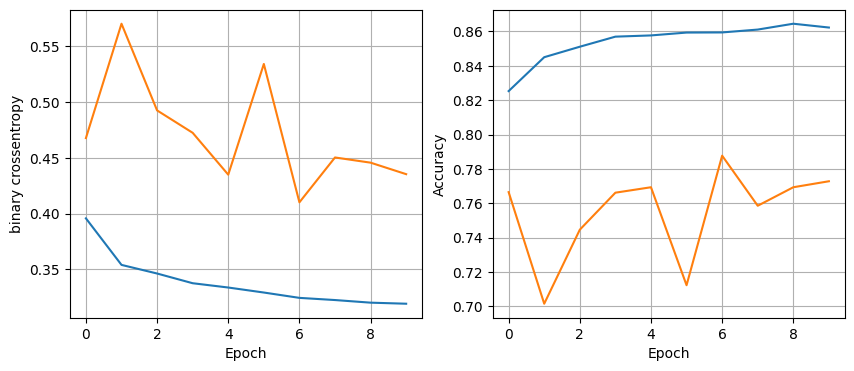

96/96 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8712
32 nodes, dropout 0, learning rate 0.005, batch size 64


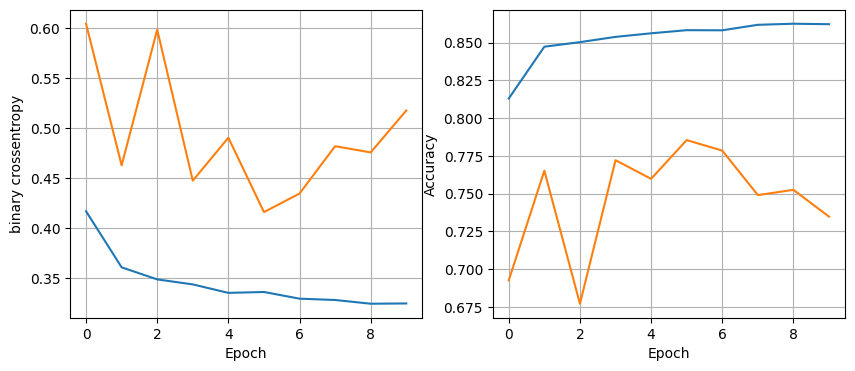

96/96 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8729
32 nodes, dropout 0, learning rate 0.005, batch size 128


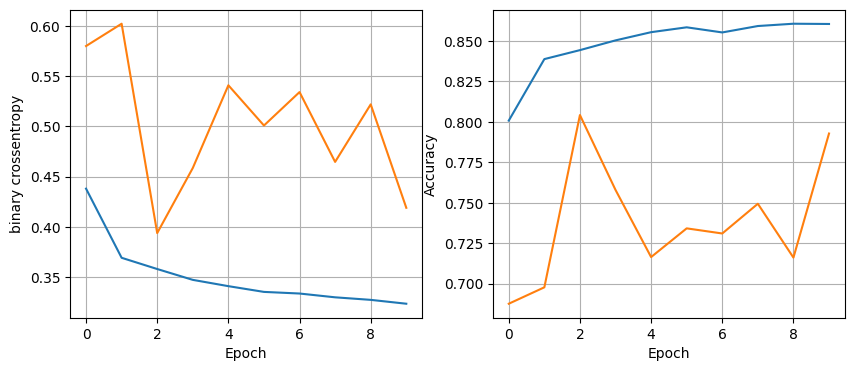

96/96 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8686
32 nodes, dropout 0, learning rate 0.001, batch size 32


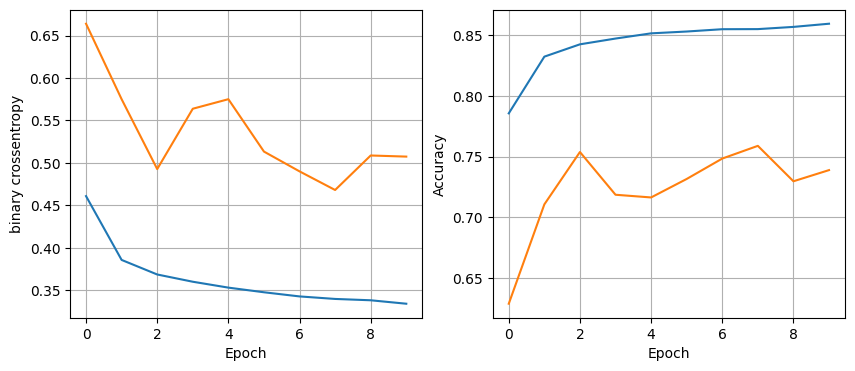

96/96 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8666
32 nodes, dropout 0, learning rate 0.001, batch size 64


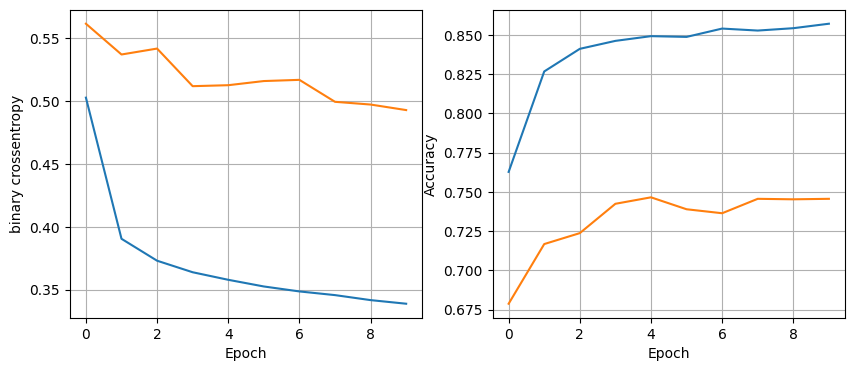

96/96 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8653
32 nodes, dropout 0, learning rate 0.001, batch size 128


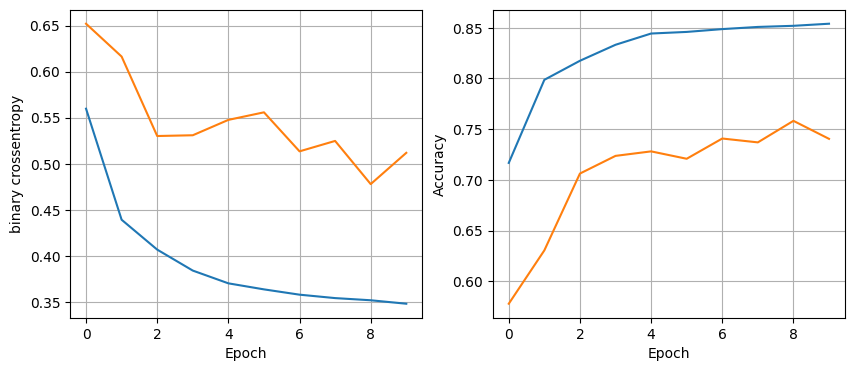

96/96 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8587
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


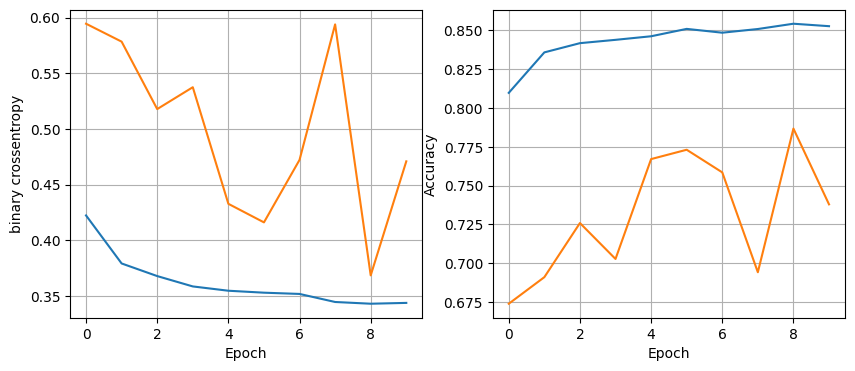

96/96 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8673
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


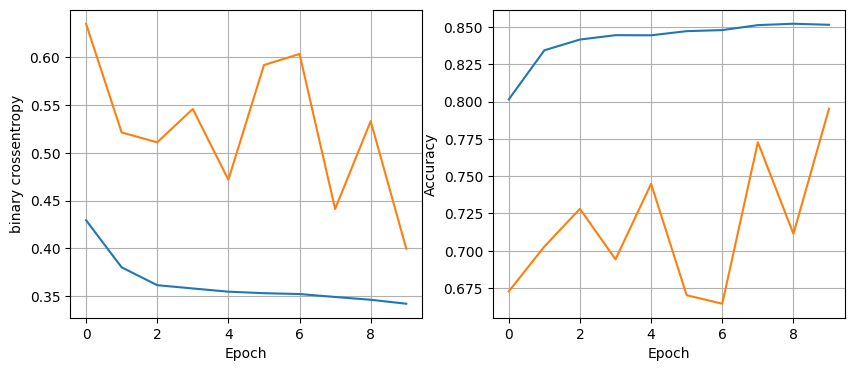

96/96 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8601
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


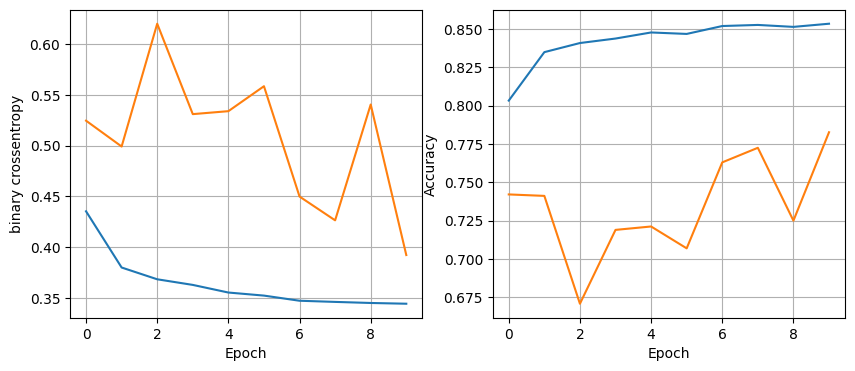

96/96 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8607
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


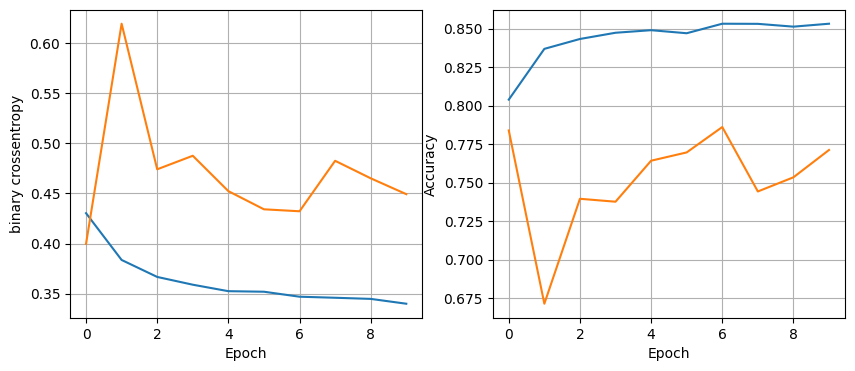

96/96 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8653
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


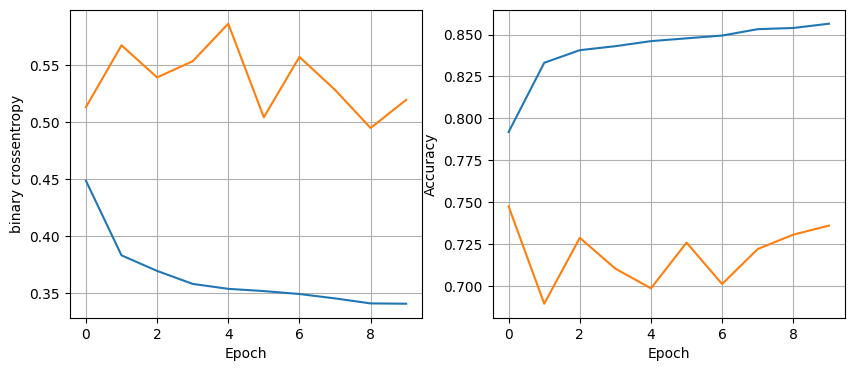

96/96 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8706
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


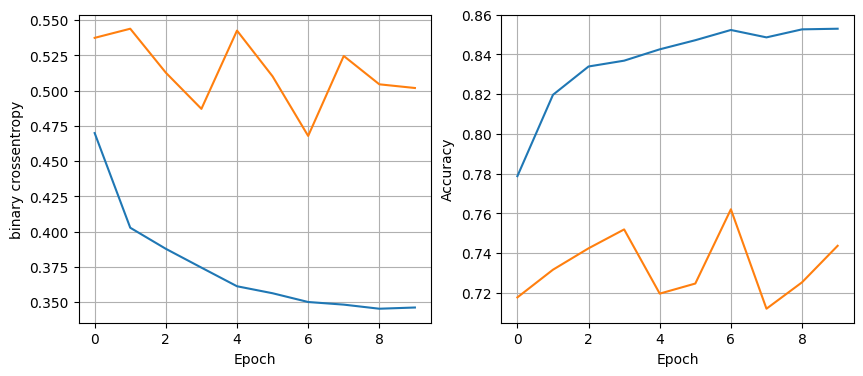

96/96 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8712
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


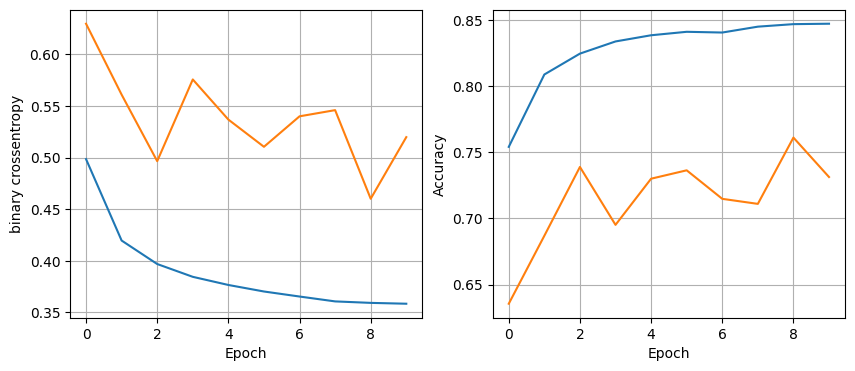

96/96 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8637
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


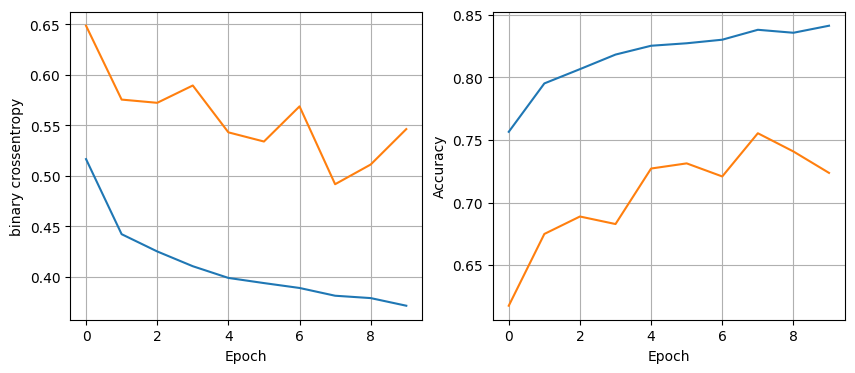

96/96 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8607
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


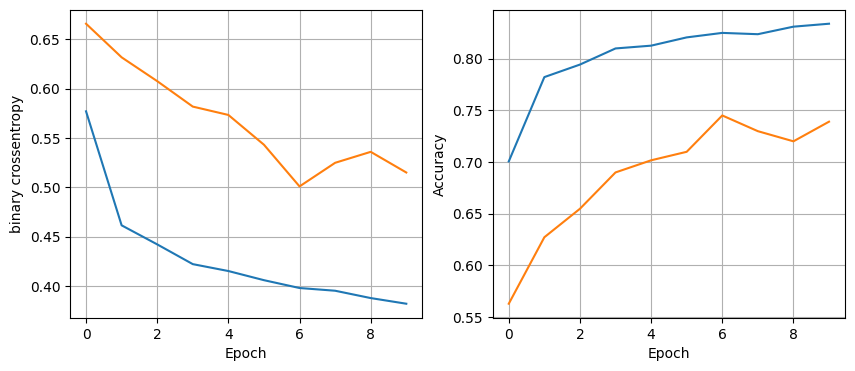

96/96 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.8555
64 nodes, dropout 0, learning rate 0.01, batch size 32


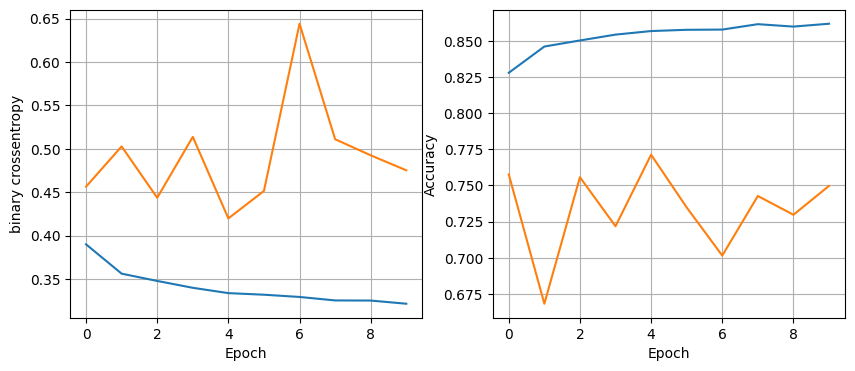

96/96 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8725
64 nodes, dropout 0, learning rate 0.01, batch size 64


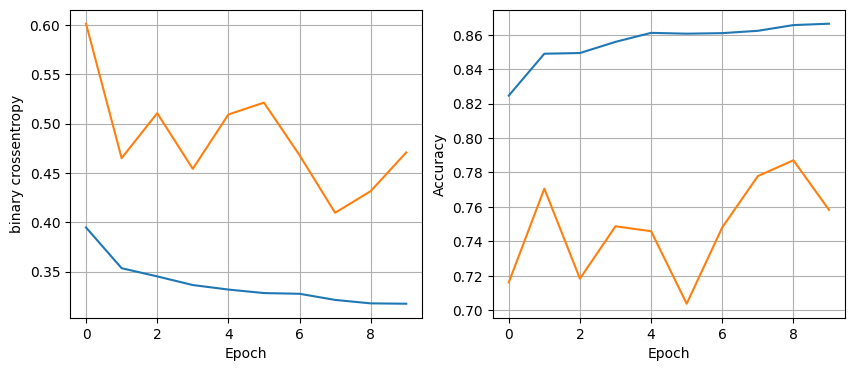

96/96 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8597
64 nodes, dropout 0, learning rate 0.01, batch size 128


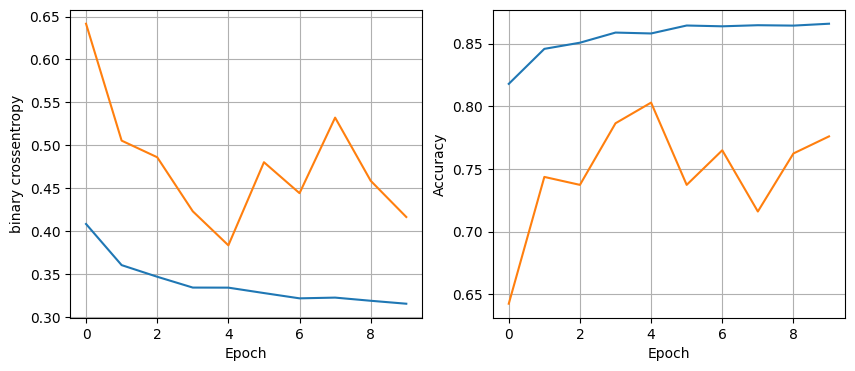

96/96 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8673
64 nodes, dropout 0, learning rate 0.005, batch size 32


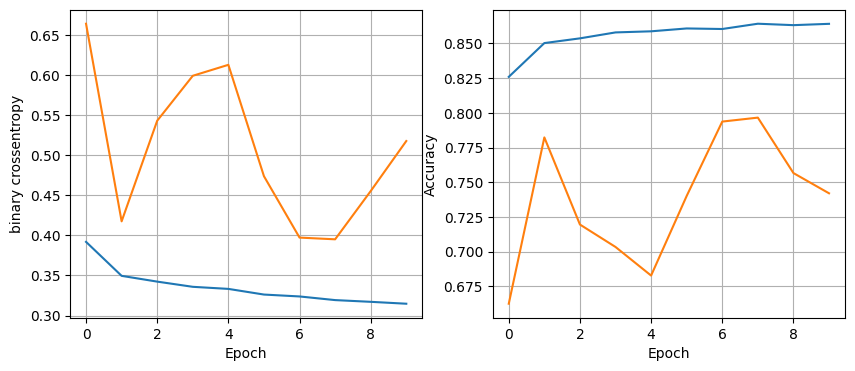

96/96 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8617
64 nodes, dropout 0, learning rate 0.005, batch size 64


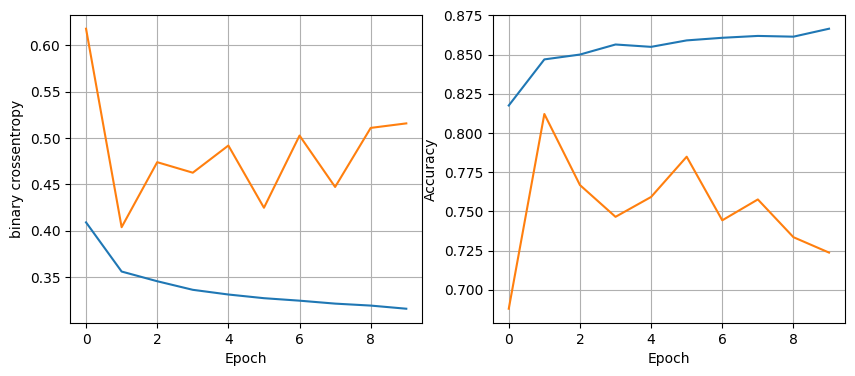

96/96 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8689
64 nodes, dropout 0, learning rate 0.005, batch size 128


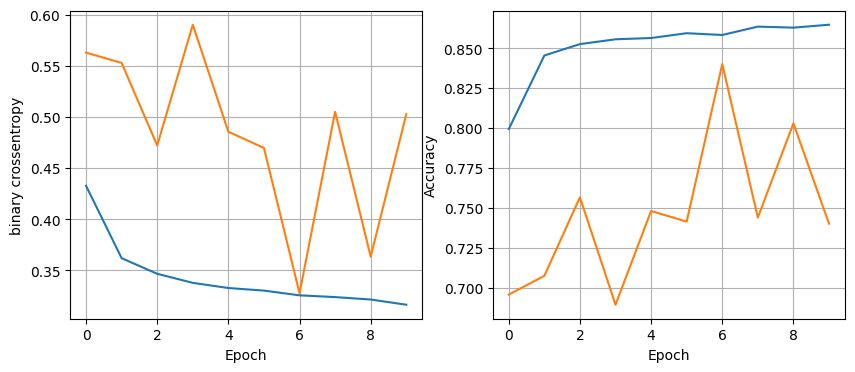

96/96 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8679
64 nodes, dropout 0, learning rate 0.001, batch size 32


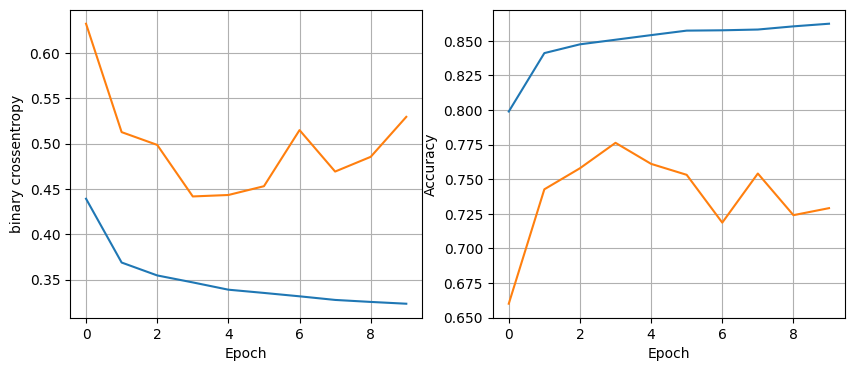

96/96 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8712
64 nodes, dropout 0, learning rate 0.001, batch size 64


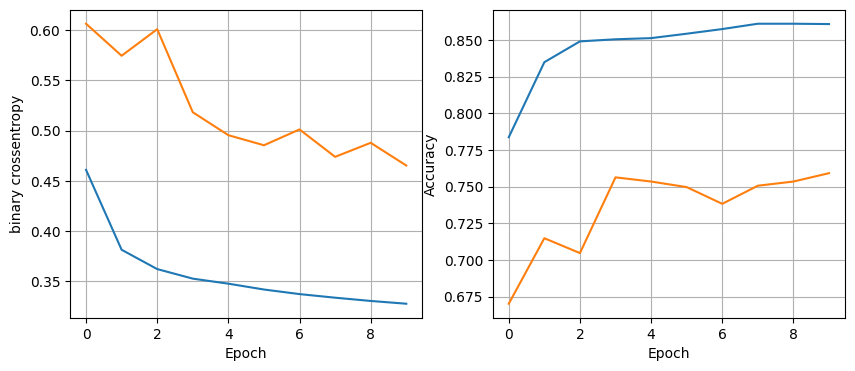

96/96 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8683
64 nodes, dropout 0, learning rate 0.001, batch size 128


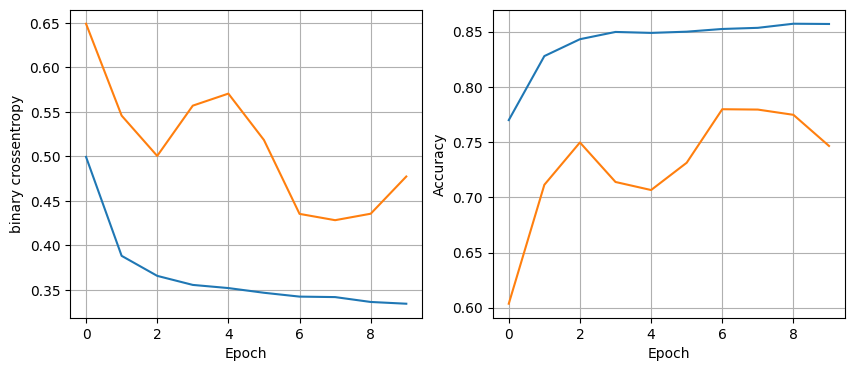

96/96 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8637
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


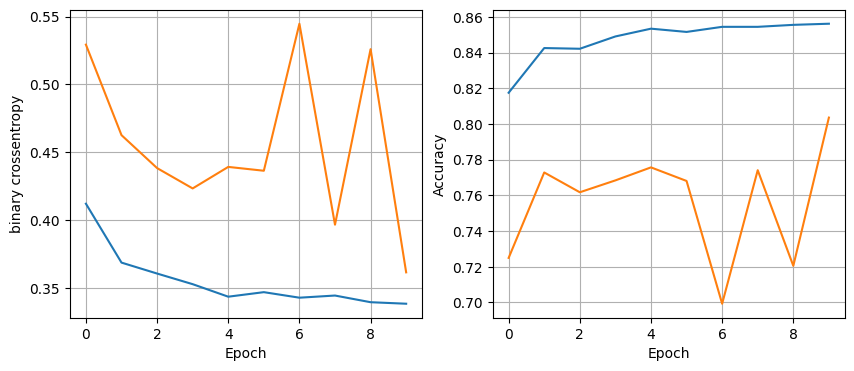

96/96 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8620
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


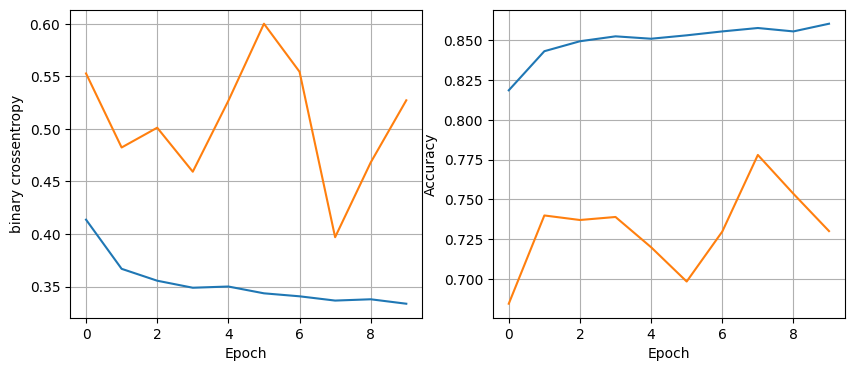

96/96 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8716
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


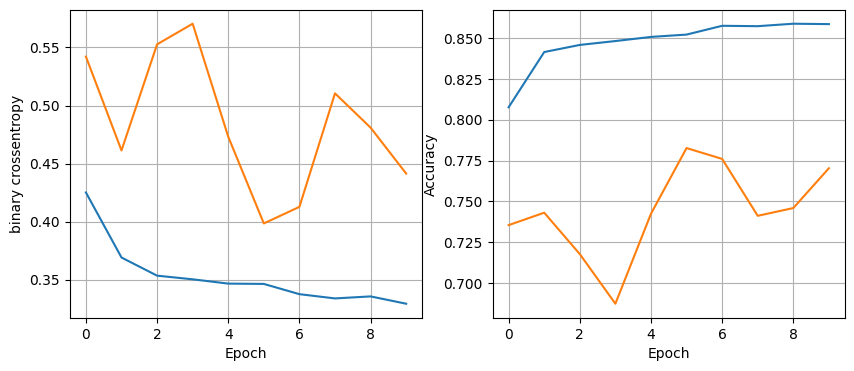

96/96 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.8702
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


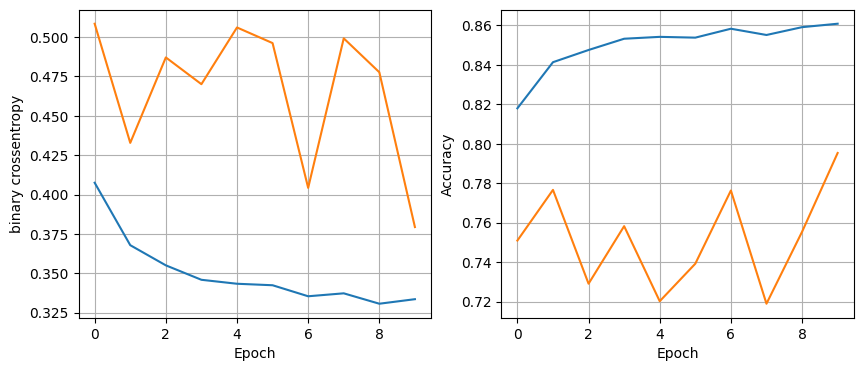

96/96 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8702
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


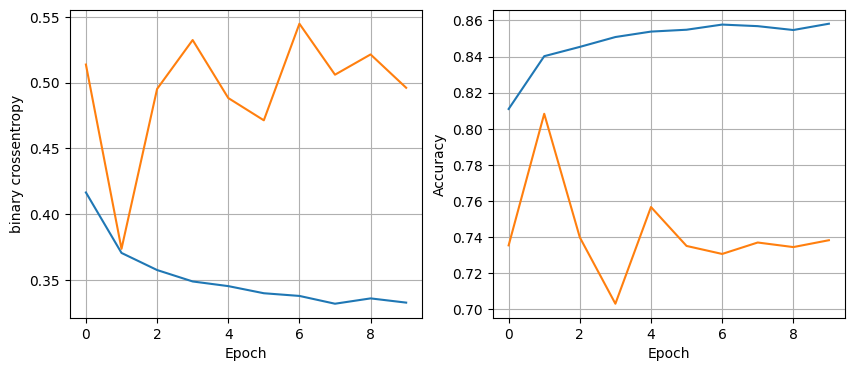

96/96 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8666
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


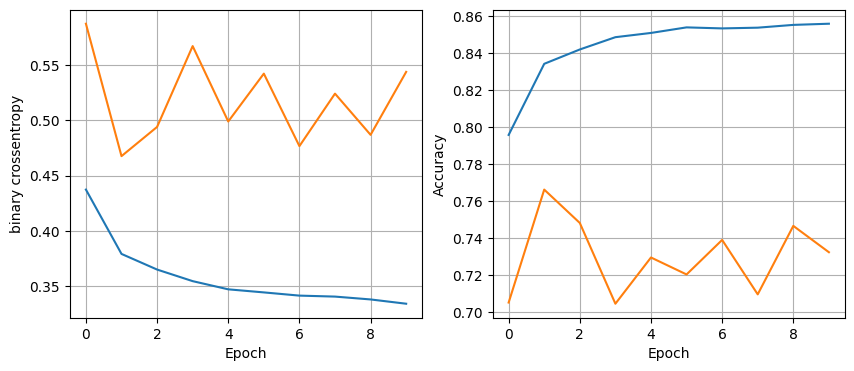

96/96 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8670
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


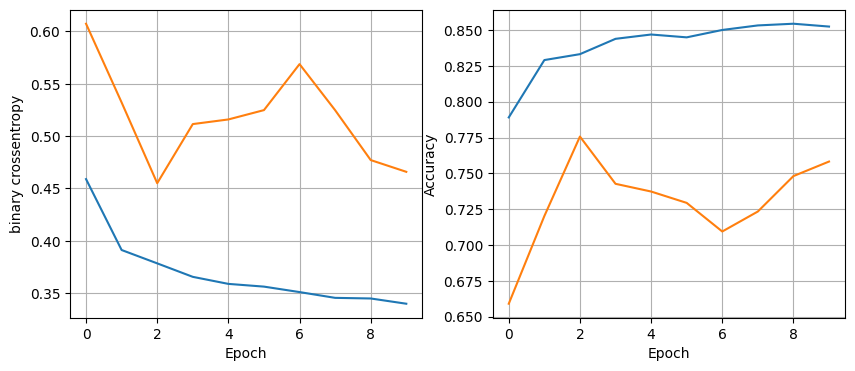

96/96 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8706
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


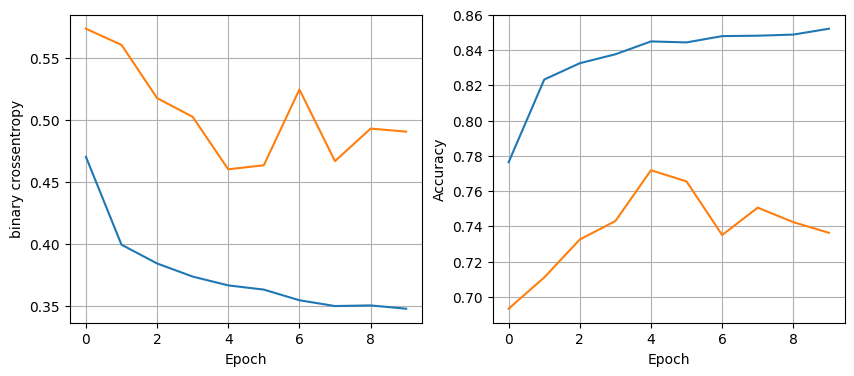

96/96 [==============================] - 0s 4ms/step - loss: 0.3271 - accuracy: 0.8696
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


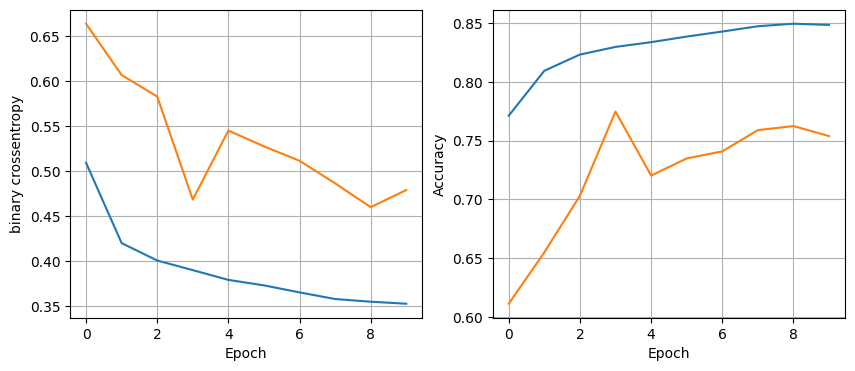

96/96 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8624


In [83]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
                model ,history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_val, y_val)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [85]:
nn_pred = least_loss_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)

119/119 [==============================] - 1s 6ms/step


In [86]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1344
           1       0.86      0.95      0.90      2460

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

